In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy
matplotlib.rcParams['figure.figsize'] = (12, 8)

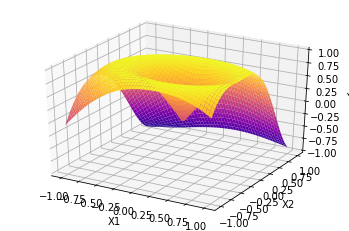

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [3]:
# %matplotlib tk

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(X1, X2, Y, cmap='plasma')
# # ax.scatter(X1, X2, Y)
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()

### Using Neural Network

In [4]:
n_hidden = 4
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [5]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  2.109036373361073


100 Error =  0.09230136333306364


200 Error =  0.059185108433092


300 Error =  0.0429168625183808


400 Error =  0.035324642315995664


500 Error =  0.03020080548655921


600 Error =  0.025933564362454375


700 Error =  0.024082450597698726


800 Error =  0.023357959811088434


900 Error =  0.022996698990638945


1000 Error =  0.022745706885602294


1100 Error =  0.022516514569394297


1200 Error =  0.022257163216589586


1300 Error =  0.0219401131434264


1400 Error =  0.021517304762640507


1500 Error =  0.02092297631349756


1600 Error =  0.020147712340694575


1700 Error =  0.019491672857675574


1800 Error =  0.019239643747440933


1900 Error =  0.019123425387455838


2000 Error =  0.019057293674891673


2100 Error =  0.018996995116962647


2200 Error =  0.018914545319291334


2300 Error =  0.018693617231104902


2400 Error =  0.01813779215091887


TclError: invalid command name "pyimage13"

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [6]:
layer1.weights, layer1.bias

(array([[-0.4429235 ,  1.13417144, -1.60826369, -0.42441081],
        [ 1.50484531,  0.76870584, -2.30254104, -1.05925183]]),
 array([-0.41669686,  1.0043235 ,  1.36133131, -0.22796638]))

## Factorize the layer 1 weights

In [7]:
layer1.weights.shape

(2, 4)

In [8]:
n_hidden2 = 4
optimizer = tnn.SGD()

w1_layer = tnn.WeightsLayer(2, n_hidden2, optimizer=optimizer)
w2_layer = tnn.WeightsLayer(n_hidden2, n_hidden, optimizer=optimizer)

In [9]:
for epoch in range(100000):
    wout = w2_layer.forward(w1_layer.weights)
    dw = wout - layer1.weights
    dw1 = w2_layer.backward(dw/dw.shape[1]) 
    w1_layer.del_weights = dw1
    
    w2_layer.update()
    w1_layer.update()
    
    if epoch%10000 == 0:
        error = (dw**2).mean()
        print(epoch, 'Error = ', error)

0 Error =  4.1718946350813555
10000 Error =  2.2675832716780374e-24
20000 Error =  4.281203599416829e-28
30000 Error =  4.281203599416829e-28
40000 Error =  4.281203599416829e-28
50000 Error =  4.281203599416829e-28
60000 Error =  4.281203599416829e-28
70000 Error =  4.281203599416829e-28
80000 Error =  4.281203599416829e-28
90000 Error =  4.281203599416829e-28


In [10]:
w1_layer.weights@w2_layer.weights

array([[-0.4429235 ,  1.13417144, -1.60826369, -0.42441081],
       [ 1.50484531,  0.76870584, -2.30254104, -1.05925183]])

In [11]:
layer1.weights

array([[-0.4429235 ,  1.13417144, -1.60826369, -0.42441081],
       [ 1.50484531,  0.76870584, -2.30254104, -1.05925183]])

In [12]:
layer1.output

array([[-1.47856554, -0.89899617,  5.27195127,  1.25687489],
       [-1.49664833, -0.85265729,  5.20632753,  1.23948933],
       [-1.51473113, -0.80631841,  5.14070379,  1.22210376],
       ...,
       [ 0.68076641,  2.8144127 , -2.41828877, -1.67682612],
       [ 0.66268361,  2.86075158, -2.48391251, -1.69421168],
       [ 0.64460081,  2.90709046, -2.54953626, -1.71159725]])

In [13]:
new_out = (xx@w1_layer.weights)@w2_layer.weights + layer1.bias
new_out

array([[-1.47861866, -0.89855379,  5.27213604,  1.25569626],
       [-1.49669717, -0.85226107,  5.20649262,  1.23837337],
       [-1.51477568, -0.80596836,  5.14084921,  1.22105048],
       ...,
       [ 0.68138196,  2.81461536, -2.4181866 , -1.67698324],
       [ 0.66330345,  2.86090807, -2.48383001, -1.69430613],
       [ 0.64522494,  2.90720078, -2.54947343, -1.71162902]])

In [14]:
layer1.output - new_out

array([[ 5.31271691e-05, -4.42384576e-04, -1.84765955e-04,
         1.17863057e-03],
       [ 4.88412170e-05, -3.96214400e-04, -1.65093704e-04,
         1.11595541e-03],
       [ 4.45552648e-05, -3.50044223e-04, -1.45421452e-04,
         1.05328024e-03],
       ...,
       [-6.15557757e-04, -2.02660907e-04, -1.02174053e-04,
         1.57123500e-04],
       [-6.19843709e-04, -1.56490730e-04, -8.25018011e-05,
         9.44483364e-05],
       [-6.24129661e-04, -1.10320553e-04, -6.28295493e-05,
         3.17731725e-05]])

##### Making Neural networks with these weights and zero bias on first Layer
##### The previous second layer is now third layer

In [15]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden2,
                          weights=copy.deepcopy(w1_layer.weights),
                          optimizer=optimizer)
layer2_ = tnn.LinearLayer(n_hidden2, n_hidden,
                          weights=copy.deepcopy(w2_layer.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden,1,
                          weights=copy.deepcopy(layer2.weights),
                          bias = copy.deepcopy(layer2.bias),
                          optimizer=optimizer)

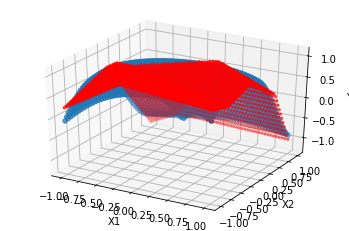

In [16]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [17]:
yout_ - yout

array([[-2.21864346e-04],
       [-2.35422672e-04],
       [-2.48980998e-04],
       ...,
       [-4.77226599e-05],
       [-5.64108388e-05],
       [-6.50990178e-05]])

In [18]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is little change in error..

(0.01813779215091887, 0.01813161756066923)

#### Double Relu Layer from the Linear Layer

In [19]:
# optimizer = tnn.Adam()

# net_ = tnn.AutoForm(new_layers=True)
# layer1_ = tnn.LinearLayer(2, n_hidden,
#                           weights=copy.deepcopy(layer1.weights),
#                           bias = copy.deepcopy(layer1.bias),
#                           optimizer=optimizer)
# layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
#                                     weights=copy.deepcopy(w2_layer.weights),
#                                     optimizer=optimizer)
# layer3_ = tnn.DoubleReluLinearLayer(n_hidden2,1,
#                                     weights=np.vstack([w3_layer.weights,w3_layer.weights]),
#                                     bias = copy.deepcopy(layer2.bias),
#                                     optimizer=optimizer)

optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden2,
                          weights=copy.deepcopy(w1_layer.weights),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                          weights=np.vstack([w2_layer.weights, w2_layer.weights]),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden,1,
                          weights=copy.deepcopy(layer2.weights),
                          bias = copy.deepcopy(layer2.bias),
                          optimizer=optimizer)

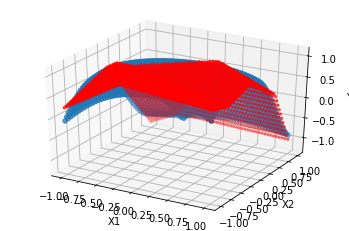

In [20]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [21]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is little change in error..

(0.01813779215091887, 0.01813161756066923)

## Adding Noise

In [22]:
# noise_old = 0.1
# noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1_.weights.shape)
# noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1_.bias.shape)

# layer1_.weights += noise_old_w1
# layer1_.bias += noise_old_b1

# noise_old_w2 = np.random.normal(loc=0, scale=noise_old, size=layer2_.weights.shape)
# noise_old_b2 = np.random.normal(loc=0, scale=noise_old, size=layer2_.bias.shape)

# layer2_.weights += noise_old_w2
# layer2_.bias += noise_old_b2

### Training the network

In [23]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy = yout_ - yy
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.01813161756066923


100 Error =  0.008465894912265568


200 Error =  0.006473570855166994


300 Error =  0.006006603902340962


400 Error =  0.005835938449980659


500 Error =  0.005741469382932116


600 Error =  0.005661540669204686


700 Error =  0.005590291799866162


800 Error =  0.005553299575770474


900 Error =  0.005507084643822876


1000 Error =  0.003447535575000143


1100 Error =  0.003200171961235715


1200 Error =  0.0029761415714357406


1300 Error =  0.002915931929014002


1400 Error =  0.002871305015868985


1500 Error =  0.0028567157705811424


1600 Error =  0.0028113464973649753


1700 Error =  0.00277571162802391


1800 Error =  0.002825177426314537


1900 Error =  0.002737713756903031


2000 Error =  0.002722224976849585


2100 Error =  0.0027181038429388515


2200 Error =  0.002694750286860452


2300 Error =  0.0026844182175015225


2400 Error =  0.002681375788911262


2500 Error =  0.0026970949853660393


2600 Error =  0.0026592858278233107


2700 Err

TclError: invalid command name "pyimage23"

In [25]:
layer1_.weights, layer1_.bias

(array([[ 0.66678419, -0.32627858],
        [-0.40541724, -0.89440517]]), array([-0.32793793, -0.22544948]))

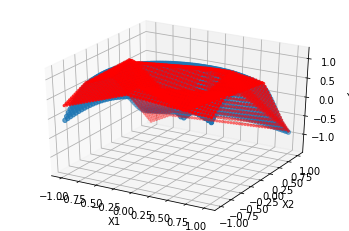

In [26]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Training the same network from scratch

In [27]:
n_hidden2, n_hidden

(2, 4)

In [28]:
optimizer = tnn.Adam()

net_0 = tnn.AutoForm(new_layers=True)
layer1_0 = tnn.LinearLayer(2, n_hidden2,
                          optimizer=optimizer)
layer2_0 = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                                    optimizer=optimizer)
layer3_0 = tnn.DoubleReluLinearLayer(n_hidden,1,
                                    optimizer=optimizer)

In [29]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_0 = net_0.forward(xx)
    dy = yout_0 - yy
    dx = net_0.backward(dy)
    
    net_0.update()
        
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_0.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7795101836288886


100 Error =  0.04126010919504068


200 Error =  0.022834330672234372


300 Error =  0.021702387670083877


400 Error =  0.020983215851605744


500 Error =  0.020419285440035222


600 Error =  0.020004961538318284


700 Error =  0.019730063893332185


800 Error =  0.01953660393411302


900 Error =  0.01939249965826558


1000 Error =  0.019253000908517594


1100 Error =  0.019084777464909


1200 Error =  0.01885945162254168


1300 Error =  0.01846853346544433


1400 Error =  0.017854770146730096


1500 Error =  0.017223141117631034


1600 Error =  0.016490169774428045


1700 Error =  0.016084306943409406


1800 Error =  0.0158431026224921


1900 Error =  0.01579548014307869


2000 Error =  0.015560217684156684


2100 Error =  0.015358765490438457


2200 Error =  0.015425577923797689


2300 Error =  0.015170890987041665


2400 Error =  0.015018245092284943


2500 Error =  0.014993639065727073


2600 Error =  0.014916773719672717


2700 Error =  0.0148740200

TclError: invalid command name "pyimage48"

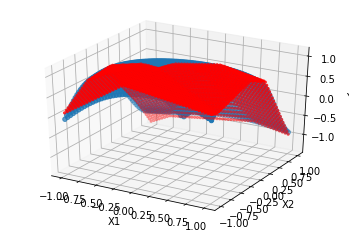

In [30]:
yout_0 = net_0.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_0.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Similar network with relu activation

In [33]:
optimizer = tnn.Adam()

net_1 = tnn.AutoForm(new_layers=True)
layer1_1 = tnn.NonLinearLayer(2, n_hidden2+1, activation=tnn.Relu(),
                          optimizer=optimizer)
layer2_1 = tnn.NonLinearLayer(n_hidden2+1, n_hidden+1, activation=tnn.Relu(),
                              optimizer=optimizer)
layer3_1 = tnn.LinearLayer(n_hidden+1,1, optimizer=optimizer)

In [ ]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_1 = net_1.forward(xx)
    dy = yout_1 - yy
    dx = net_1.backward(dy)
    
    net_1.update()
        
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_1.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7542639663769037


100 Error =  0.0443300475954496


200 Error =  0.028513129474507855


300 Error =  0.027295114669558886


400 Error =  0.026490343506855935


500 Error =  0.025728695454628508


600 Error =  0.025103911424078737


700 Error =  0.024648000453012894


800 Error =  0.02434441580574412


900 Error =  0.024164362986007208


1000 Error =  0.024052396953687667


1100 Error =  0.02396348709442333


1200 Error =  0.02387764388879851


1300 Error =  0.023787155096796853


1400 Error =  0.0236950363682196


1500 Error =  0.023595750392904687


1600 Error =  0.02350488929199377


1700 Error =  0.023418785954616873


1800 Error =  0.017839816201389195


1900 Error =  0.01397750849808896
